# Logistic regression

1.   Classificaiton problems have discrete and finite outputs called and categories
2.   there are two main type of classification
      1.  Binary or bionomial classification(2 classes)
      2.  Multiclass or multinomial Classification (multiple classes)
3.    Logisitc regression belongs to linear classifier




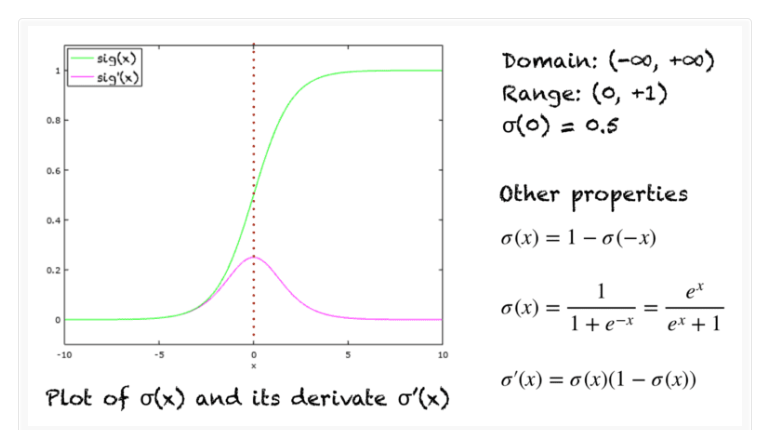

f(x)= b0+bixi+.....+,also called as logit function


where the b is the **estimator** which are also called as **predicted weights**


To get the best weights,you usually maximize the log **likelyhood function(LLF)**



---
Classification performance

*   Binary calssification has four posssible types of results

    *   True positive = correctly predicted positive
    *   True NEgative = correctly negative
    *   false positive and negative = Falsely predicted
*   The *positive predicted value* = TP/TP+TF

*   The *negative predictive values* = TN/TN+FN

*   The *sensitivity* = TP/TP+FN

*   The *specificity* = TN/TN+FP


### Single variate logisctic regression

Most straight forward logistic regression




Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

The input data

In [ ]:
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [ ]:
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [ ]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

Create model and train

In [ ]:
model = LogisticRegression(solver='liblinear',random_state=0)
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

Check intercept and coeff

In [ ]:
print(model.intercept_)
print(model.coef_)

[-1.04608067]
[[0.51491375]]


Evaluating

1.   In *logistic regression* function **.predict_proba** will give us two probabilty the proba is of obv being in 0 class and second proba of obv being in 1 class




In [ ]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

Predicting

*   we can get actual predictor



In [ ]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

Checking score

In [ ]:
model.score(x,y)

0.9

Confusion matrix

In [ ]:
confusion_matrix(y,model.predict(x))

array([[3, 1],
       [0, 6]])

Reading confusion matirx

array([[3, 1],
       [0, 6]])

TN = upper left

FP = upper right

FN = lower left

TP = lower right


Plotting CM

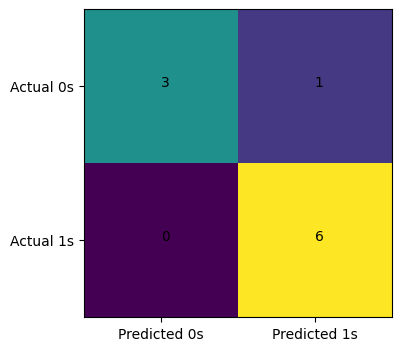

In [ ]:
cm = confusion_matrix(y,model.predict(x))

fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
  for j in range(2):
    ax.text(j,i,cm[i,j])#ha = horizontal alignment va= vertical alignment
plt.show()

Classification report



In [ ]:
print(classification_report(y,model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



Replace function

In [ ]:
df = pd.DataFrame({'A': [0,1,2,3,4],
                  'B': [5,6,7,8,9],
                  'C': ['a','b','c','d','e']})
df.replace(0,5)

,A,B,C
0,5,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


# Working on Iris dataset

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

In [ ]:
df

Replacing the variety to classes 0,1

In [ ]:
df = df.replace({'Setosa':0, 'Virginica':1,'Versicolor':1})
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


Finding correlation between the features

In [ ]:
df.corr()

,sepal.length,sepal.width,petal.length,petal.width,variety
sepal.length,1.000000,-0.117570,0.871754,0.817941,0.717416
sepal.width,-0.117570,1.000000,-0.428440,-0.366126,-0.603348
petal.length,0.871754,-0.428440,1.000000,0.962865,0.922765
petal.width,0.817941,-0.366126,0.962865,1.000000,0.887344
variety,0.717416,-0.603348,0.922765,0.887344,1.000000


Training model

In [ ]:
model = LogisticRegression(solver='liblinear',random_state=0)
x = df[['sepal.length','petal.length']]
y = df['variety']
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

Calculating the proba

In [ ]:
model.predict_proba(x)

Predicting

In [ ]:
model.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Confusion matrix

In [ ]:
cm = confusion_matrix(y,model.predict(x))
cm

array([[ 50,   0],
       [  0, 100]])

Classification report

In [ ]:
print(classification_report(y,model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00       100

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



Score

In [ ]:
model.score(x,y)

1.0

In [ ]:
model.coef_

array([[-1.41892455,  3.02030213]])

In [ ]:
x = df['sepal.width']
y = df['variety']
arr_x = np.array(x).reshape(-1,1)
arr_y = np.array(y)

In [ ]:
model.fit(arr_x,arr_y)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
model.predict_proba(arr_x)

In [ ]:
model.score(arr_x,arr_y)

0.74

In [ ]:
x = df[['petal.width','sepal.width']]
y = df['variety']

In [ ]:
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
model.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
model.score(x,y)

1.0

# Cars dataset

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv')
df

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
df = df.drop('Unnamed: 0',axis=1)

In [ ]:
x1 = np.array(df['mpg']).reshape(-1,1)
x2 = np.array(df['cyl']).reshape(-1,1)
x3 = np.array(df['disp']).reshape(-1,1)
x4 = np.array(df['hp']).reshape(-1,1)
x5 = np.array(df['drat']).reshape(-1,1)
x6 = np.array(df['wt']).reshape(-1,1)
x7 = np.array(df['qsec']).reshape(-1,1)
y = df['vs']

In [ ]:
model = LogisticRegression(solver='liblinear',random_state=0)
model.fit(x1,y)
model.fit(x3,y)
model.fit(x4,y)
model.fit(x5,y)
model.fit(x6,y)
model.fit(x7,y)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
print(model.predict(x1))
print(model.predict(x2))
print(model.predict(x3))
print(model.predict(x4))
print(model.predict(x5))
print(model.predict(x6))
print(model.predict(x7))

[1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
print('Score for mpg: ',model.score(x1,y))
print('Score for cyl: ',model.score(x2,y))
print('Score for disp: ',model.score(x3,y))
print('Score for hp: ',model.score(x4,y))
print('Score for drat: ',model.score(x5,y))
print('Score for wt: ',model.score(x6,y))
print('Score for qsec: ',model.score(x7,y))

Score for mpg:  0.8125
Score for cyl:  0.5625
Score for disp:  0.4375
Score for hp:  0.4375
Score for drat:  0.5625
Score for wt:  0.5625
Score for qsec:  0.6875


# Life Expectency dataset

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a/raw/8629d284e13976dcb13bb0b27043224b9266fffa/Life_Expectancy_Data.csv')
df.head(50)

,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,65.0,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,62.0,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,64.0,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,67.0,...,67.0,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,Asia,2011,Developing,59.2,275,71,0.01,7.097109,68.0,...,68.0,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5
5,Afghanistan,Asia,2010,Developing,58.8,279,74,0.01,79.679367,66.0,...,66.0,9.20,66,0.1,553.328940,2883167,18.4,18.4,0.448,9.2
6,Afghanistan,Asia,2009,Developing,58.6,281,77,0.01,56.762217,63.0,...,63.0,9.42,63,0.1,445.893298,284331,18.6,18.7,0.434,8.9
7,Afghanistan,Asia,2008,Developing,58.1,287,80,0.03,25.873925,64.0,...,64.0,8.33,64,0.1,373.361116,2729431,18.8,18.9,0.433,8.7
8,Afghanistan,Asia,2007,Developing,57.5,295,82,0.02,10.910156,63.0,...,63.0,6.73,63,0.1,369.835796,26616792,19.0,19.1,0.415,8.4
9,Afghanistan,Asia,2006,Developing,57.3,295,84,0.03,17.171518,64.0,...,58.0,7.43,58,0.1,272.563770,2589345,19.2,19.3,0.405,8.1


In [ ]:
df = df.replace({'Developing': 0,'Developed': 1})
df

,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,Asia,2015,0,65.0,263,62,0.01,71.279624,65.0,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,Asia,2014,0,59.9,271,64,0.01,73.523582,62.0,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,Asia,2013,0,59.9,268,66,0.01,73.219243,64.0,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,Asia,2012,0,59.5,272,69,0.01,78.184215,67.0,...,67.0,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,Asia,2011,0,59.2,275,71,0.01,7.097109,68.0,...,68.0,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,Zimbabwe,Africa,2004,0,44.3,723,27,4.36,0.000000,68.0,...,67.0,7.13,65,33.6,454.366654,12777511,9.4,9.4,0.407,9.2
2457,Zimbabwe,Africa,2003,0,44.5,715,26,4.06,0.000000,7.0,...,7.0,6.52,68,36.7,453.351155,12633897,9.8,9.9,0.418,9.5
2458,Zimbabwe,Africa,2002,0,44.8,73,25,4.43,0.000000,73.0,...,73.0,6.53,71,39.8,57.348340,125525,1.2,1.3,0.427,10.0
2459,Zimbabwe,Africa,2001,0,45.3,686,25,1.72,0.000000,76.0,...,76.0,6.16,75,42.1,548.587312,12366165,1.6,1.7,0.427,9.8


In [ ]:
df.columns

Index(['Country', 'Continent', 'Year', 'Status', 'Life_expectancy ',
       'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure',
       'Hepatitis_B', 'Measles ', ' BMI ', 'under_five_deaths ', 'Polio',
       'Total_expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [ ]:
df.isnull().sum()

Country                            0
Continent                          0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
 BMI                               0
under_five_deaths                  0
Polio                              8
Total_expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income_composition_of_resources    0
Schooling                          3
dtype: int64

In [ ]:
df['Hepatitis_B'] = df['Hepatitis_B'].fillna(df['Hepatitis_B'].mean())
df['Total_expenditure'] = df['Total_expenditure'].fillna(df['Total_expenditure'].mean())
df['Income_composition_of_resources'] = df['Income_composition_of_resources'].fillna(df['Income_composition_of_resources'].mean())
df['Schooling'] = df['Schooling'].fillna(df['Schooling'].mean())
df['Polio'] = df['Polio'].fillna(df['Polio'].mean())


In [ ]:
# Replace 'Unknown' with a suitable value (e.g., mean)
mean_diphtheria = df['Diphtheria '][df['Diphtheria '] != 'Unknown'].astype(float).mean()
df['Diphtheria '] = df['Diphtheria '].replace('Unknown', mean_diphtheria)

# Convert the column to integers
df['Diphtheria '] = df['Diphtheria '].astype(int)

In [ ]:
mean_diphtheria = df['Population'][df['Population'] != 'Unknown'].astype(float).mean()
df['Population'] = df['Population'].replace('Unknown', mean_diphtheria)

# Convert the column to integers
df['Population'] = df['Population'].astype(int)

In [ ]:
x1 = np.array(df['Life_expectancy ']).reshape(-1,1)
x2  = np.array(df['Adult_Mortality']).reshape(-1,1)
x3 =  np.array(df['infant_deaths']).reshape(-1,1)
x4 = np.array(df['Alcohol']).reshape(-1,1)
x5 = np.array(df['percentage_expenditure']).reshape(-1,1)
x6 =  np.array(df['Hepatitis_B']).reshape(-1,1)
x7 =  np.array(df['Measles ']).reshape(-1,1)
x8 =  np.array(df[' BMI ']).reshape(-1,1)
x9 =  np.array(df['under_five_deaths ']).reshape(-1,1)
x10 = np.array(df['Polio']).reshape(-1,1)
x11 = np.array(df['Total_expenditure']).reshape(-1,1)
x12=  np.array(df['Diphtheria ']).reshape(-1,1)
x13=  np.array(df[' HIV/AIDS']).reshape(-1,1)
x14=  np.array(df['GDP']).reshape(-1,1)
x15 = np.array(df['Population']).reshape(-1,1)
x16 = np.array(df[' thinness  1-19 years']).reshape(-1,1)
x17  = np.array(df[' thinness 5-9 years']).reshape(-1,1)
x18 = np.array(df['Income_composition_of_resources']).reshape(-1,1)
x19 = np.array(df['Schooling']).reshape(-1,1)

y = df['Status']

In [ ]:
x1

array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]])

In [ ]:
life = LogisticRegression()
# life.fit(x1,y)
life.fit(x2,y)
life.fit(x3,y)
life.fit(x4,y)
life.fit(x5,y)
life.fit(x6,y)
life.fit(x7,y)
life.fit(x8,y)
life.fit(x9,y)
life.fit(x10,y)
life.fit(x11,y)
life.fit(x12,y)
life.fit(x13,y)
life.fit(x14,y)
# life.fit(x15,y)
life.fit(x16,y)
life.fit(x17,y)
life.fit(x18,y)
life.fit(x19,y)

LogisticRegression()

In [ ]:
life.score(x1,y)
#same for all

0.18203982121088988

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x1,y)
clf.score(x1,y)

0.8996342950020317

# IRIS dataset with decision tree

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
# df = df.replace({'Setosa': 0,'Versicolor': 1,'Virginica': 2})
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
x = df[['petal.length']]
y = df['variety']

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)

In [ ]:
y_pred = clf.predict(x)

In [ ]:
clf.score(x,y)

0.9533333333333334

# Decision tree

*   decision is a heirarchical data structure that represent data through divide and conquer stratergy

*   **Entropy** if all example belong to same label entropy is 0.


      
Entropy $$ S = -p_{+}log(p_{+}) - p_{-}log(p_{-})$$

$$ S(p_1, p_2, ..., p_n) = -\sum_{i=1}^{k} p_i log(p_i)$$


**infromation Gain**\
IG(A) = Entropy before - AvgEntropy after choosing A\
$$
IG(A) = H(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} H(S_v)$$\
\
Given attribute, we can now,understand the notion of information gain the expected in entropy by positioning on a given attribute information gain is:



$$Gain(S, a) = Entropy(S) - \sum_{v \in values(a)} \frac{|S_v|}{|S|} Entropy(S_a)$$

\
In decision tree with each partiiotn the no of samples are reduced thus the efficiency of the algo as compared to logistic increases

\
**Reason of overfitting**


1.   Too much variance in the training data such that data is not a representative sample of the instance space and we split on irrelevant features
2.   Too much noise in the training data incorrect feature or class or label

**Pruning**

1.  Pre pruning: The branching of the tree is decided before the tree
2.  Post pruning: Whole tree is constructed and then from leaf node the branches are removed

**Pruning Evaluation**

1.  Cross validaiton: Reserve hold-out set to evaluate utility
2.  Statistical testing: Test if observed regularity can be dismissed as likely to occur by chance
3.  Minimun description Length


In [ ]:
from google.colab import files
files.upload()


Saving or.jpg to or.jpg


{'or.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\x01\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\xff\xc2\x00\x11\x08\x06?\x03\x83\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00/\x00\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x02\xfc\xe8\xc6\x92\x88Rk4\xb0 \x00\xb2\xc2\x82\xcb\x00\x053e%\x00\x00\x8a\x00\xb2\xc8,(P\x00\xb0\x16P\x04\xa3 \xb2\xc2\x815\x92\x82P\xb2\x88\xb0\x01,\x16Z\xb0\x89BP\x95H\x00*R%\x16R\xe6\xc2\x81e3B,\x02\xa5A@\n\xa3\x02\x00\

**Conditional probability**

When one event has occured and we find out other event probabilty

Tennis porb
\
| wind | Play tennis |\
| H | -- | Y|\
| H | -- | Y|\
| L | -- | Y|\
| L | -- | N|\
| L | -- | N|\
| L | -- | N|\
| L | -- | N|\
Entropy of Play tennis when wind given condition\



$$S = -\frac{2}{2} \log_2 \left( \frac{2}{2} \right) + \frac{1}{5} \log_2 \left( \frac{1}{5} \right) + \frac{4}{5} \log_2 \left( \frac{4}{5} \right)$$


\
When humidity has occured



$$S = - \left[ \frac{2}{2} \log_2 \left( \frac{2}{2} \right) \right] + \left[ \frac{1}{3} \log_2 \left( \frac{1}{3} \right) + \frac{2}{3} \log_2 \left( \frac{2}{3} \right) \right] + \left[ \frac{2}{2} \log_2 \left( \frac{2}{2} \right) \right]$$



## Beta1 and beta2

$$Var(b_1) = \sigma^2(b_1) = \frac{\sum x_i^2}{n \sum x_i^2} \sigma^2 $$

$$SE(b_1) = \sqrt{Var(b_1)}$$

$$Var(b_2) = \sigma^2 = \frac{\sigma^2}{\sum x_i^2}$$

$$SE(b_2) = \sqrt{Var(b_2)}$$

$$\hat{\sigma}^2 = \frac{\sum e_i^2}{n-2} = \frac{RSS}{n-2} = \frac{RSS}{df}$$

$$SE(e_i) = \sqrt{\hat{\sigma}^2}$$

df= degree of freedom

Decision Tree Example:

| A | B | A xor B |

| F | F | F |

| F | T | T |\
| T | F | T |\
| T | T | F |



                      A
                  f /       \
                 B            B
               f/   \        f/  \
               F    T       T   F

In [ ]:
import pandas as pd
s = pd.Series(['e','b'])*3

0    eee
1    bbb
dtype: object

In [ ]:
s2= pd.Series(range(1,4))

In [ ]:
s2.index

RangeIndex(start=0, stop=3, step=1)

In [ ]:
df1 = pd.read_csv('https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv')
df.index

Index(['Tom', 'Dick', 'Harry'], dtype='object')

## Basics of Pandas

**Index of the object**

-the pandas index provide the axis labels for the Series & Dataframes objects it can only contain hashable objects a pandas Series has one index and Dataframes has two index

In [ ]:
df.columns.is_monotonic_increasing

False

In [ ]:
df.columns.has_duplicates

False

In [ ]:
df.columns.nlevels

1

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
d=pd.read_csv('/content/sample_data/california_housing_train.csv')

idx = df.columns
idx

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
idx.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'], dtype=object)

In [ ]:
idx.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [ ]:
idx.equals(1)

False

In [ ]:
idx.nunique()

9

In [ ]:
idx.min()

'households'

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
df.equals(d)# checks if 2 dataframes are equal

True

In [ ]:
from io import StringIO

In [ ]:
data = """ animal , Cuteness ,Describale
row-1, dog, 8.7, True
row2, bat, 2.6, False"""

df = pd.read_csv(StringIO(data),header=0,index_col=0,skipinitialspace=True)


In [ ]:
df

,animal,Cuteness,Describale
row-1,dog,8.7,True
row2,bat,2.6,False


In [ ]:
workbook = pd.ExcelFile('/content/Book1.xlsx')
dict = {}
for sheet_name in workbook.sheet_names:
  d = workbook.parse(sheet_name)
  dict[sheet_name] = d



In [ ]:
dict

{'Sheet1':    Rollno Name  Marks
 0       1    b     20
 1       2    r     10
 2       3    h     30,
 'Sheet2':    roll  name
 0     1     3
 1     2     4}

In [ ]:
# dict to series
s3 = pd.Series({'Tom':1,'Dick':2,'Harry':3})
s3.index
s4 = pd.Series({'Tom':5,'Dick':4,'Harry':6})
df = pd.concat({'A':s3, 'B':s4},axis=1)
df

,A,B
Tom,1,5
Dick,2,4
Harry,3,6


In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv')
df
n=4
dfh = df.head(n)
dft = df.tail(n)
dfs = df.describe()
top_left_corner_df = df.iloc[:5,:5]
print(dfh)
print(dft)
print(dfs)
print(top_left_corner_df)

       Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0       Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1   Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2      Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3  Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
        Unnamed: 0   mpg  cyl   disp   hp  drat    wt  qsec  vs  am  gear  \
28  Ford Pantera L  15.8    8  351.0  264  4.22  3.17  14.5   0   1     5   
29    Ferrari Dino  19.7    6  145.0  175  3.62  2.77  15.5   0   1     5   
30   Maserati Bora  15.0    8  301.0  335  3.54  3.57  14.6   0   1     5   
31      Volvo 142E  21.4    4  121.0  109  4.11  2.78  18.6   1   1     4   

    carb  
28     4  
29     6  
30     8  
31     2  
             mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000  

In [ ]:
dfT = df.T # transpose
l = df.axes # list of rows of col index
(r,c) = df.axes #from above
s = df.dtypes # datatypes
b = df.empty # true for empty dataframe
i = df.ndim # number of axes 2
t = df.shape # row-count col-count
(r,c) = df.shape #from above
a = df.values # numpy array for df
print(dfT)
print(l)
print(r,c)
print(s)
print(b)
print(i)
print(t)
print(a)

                   0              1           2               3   \
Unnamed: 0  Mazda RX4  Mazda RX4 Wag  Datsun 710  Hornet 4 Drive   
mpg              21.0           21.0        22.8            21.4   
cyl                 6              6           4               6   
disp            160.0          160.0       108.0           258.0   
hp                110            110          93             110   
drat              3.9            3.9        3.85            3.08   
wt               2.62          2.875        2.32           3.215   
qsec            16.46          17.02       18.61           19.44   
vs                  0              0           1               1   
am                  1              1           1               0   
gear                4              4           4               3   
carb                4              4           1               1   

                           4        5           6          7         8   \
Unnamed: 0  Hornet Sportabout  Valiant  

In [ ]:
type(a)

numpy.ndarray

In [ ]:
dfc = df
dfc

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
drf = df.rank()
# dfs = df.sort()
df['cyl'] = df.sort_values
# dfc = df.astype(dtype)
# dfc

TypeError: '<' not supported between instances of 'method' and 'method'

In [ ]:
df1.to_csv('name1.csv', encoding = 'utf-8')

In [ ]:
from pandas import ExcelWriter
writer = ExcelWriter('pandas_simple.xlsx')
df1.to_excel(writer,'Sheet1')
writer.close()

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.rename(columns=({'population':'pop'}),inplace = True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,pop,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
type(df[['pop']])

pandas.core.frame.DataFrame

In [ ]:
df.existing_cols = df['pop']/df['median_house_value']
df['new'] = df.existing_cols
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,pop,households,median_income,median_house_value,new
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0.015172
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,0.014095
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0.003886
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,0.007016
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,0.009527
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,0.008142
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,0.015114
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,0.012008
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,0.015128


In [ ]:
import numpy as np
df['random'] = np.random.rand(len(df))
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,pop,households,median_income,median_house_value,new,random
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0.015172,0.176309
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,0.014095,0.519946
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0.003886,0.181401
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,0.007016,0.265501
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,0.009527,0.937696
...,...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,0.008142,0.631940
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,0.015114,0.068450
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,0.012008,0.282818
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,0.015128,0.702089


In [ ]:
df['new_col'] = np.repeat(np.nan,len(df))
df['new_col']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
16995   NaN
16996   NaN
16997   NaN
16998   NaN
16999   NaN
Name: new_col, Length: 17000, dtype: float64

In [ ]:
df['index_as_cols'] = df.index
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,pop,households,median_income,median_house_value,new,random,new_col,index_as_cols
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0.015172,0.176309,NaN,0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,0.014095,0.519946,NaN,1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0.003886,0.181401,NaN,2
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,0.007016,0.265501,NaN,3
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,0.009527,0.937696,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,0.008142,0.631940,NaN,16995
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,0.015114,0.068450,NaN,16996
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,0.012008,0.282818,NaN,16997
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,0.015128,0.702089,NaN,16998


In [ ]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df[['B','A']] = df[['A','B']]
df

,A,B
0,4,1
1,5,2
2,6,3


In [ ]:
df = df.drop(0,axis=0)


In [ ]:
df

,B
1,2
2,3


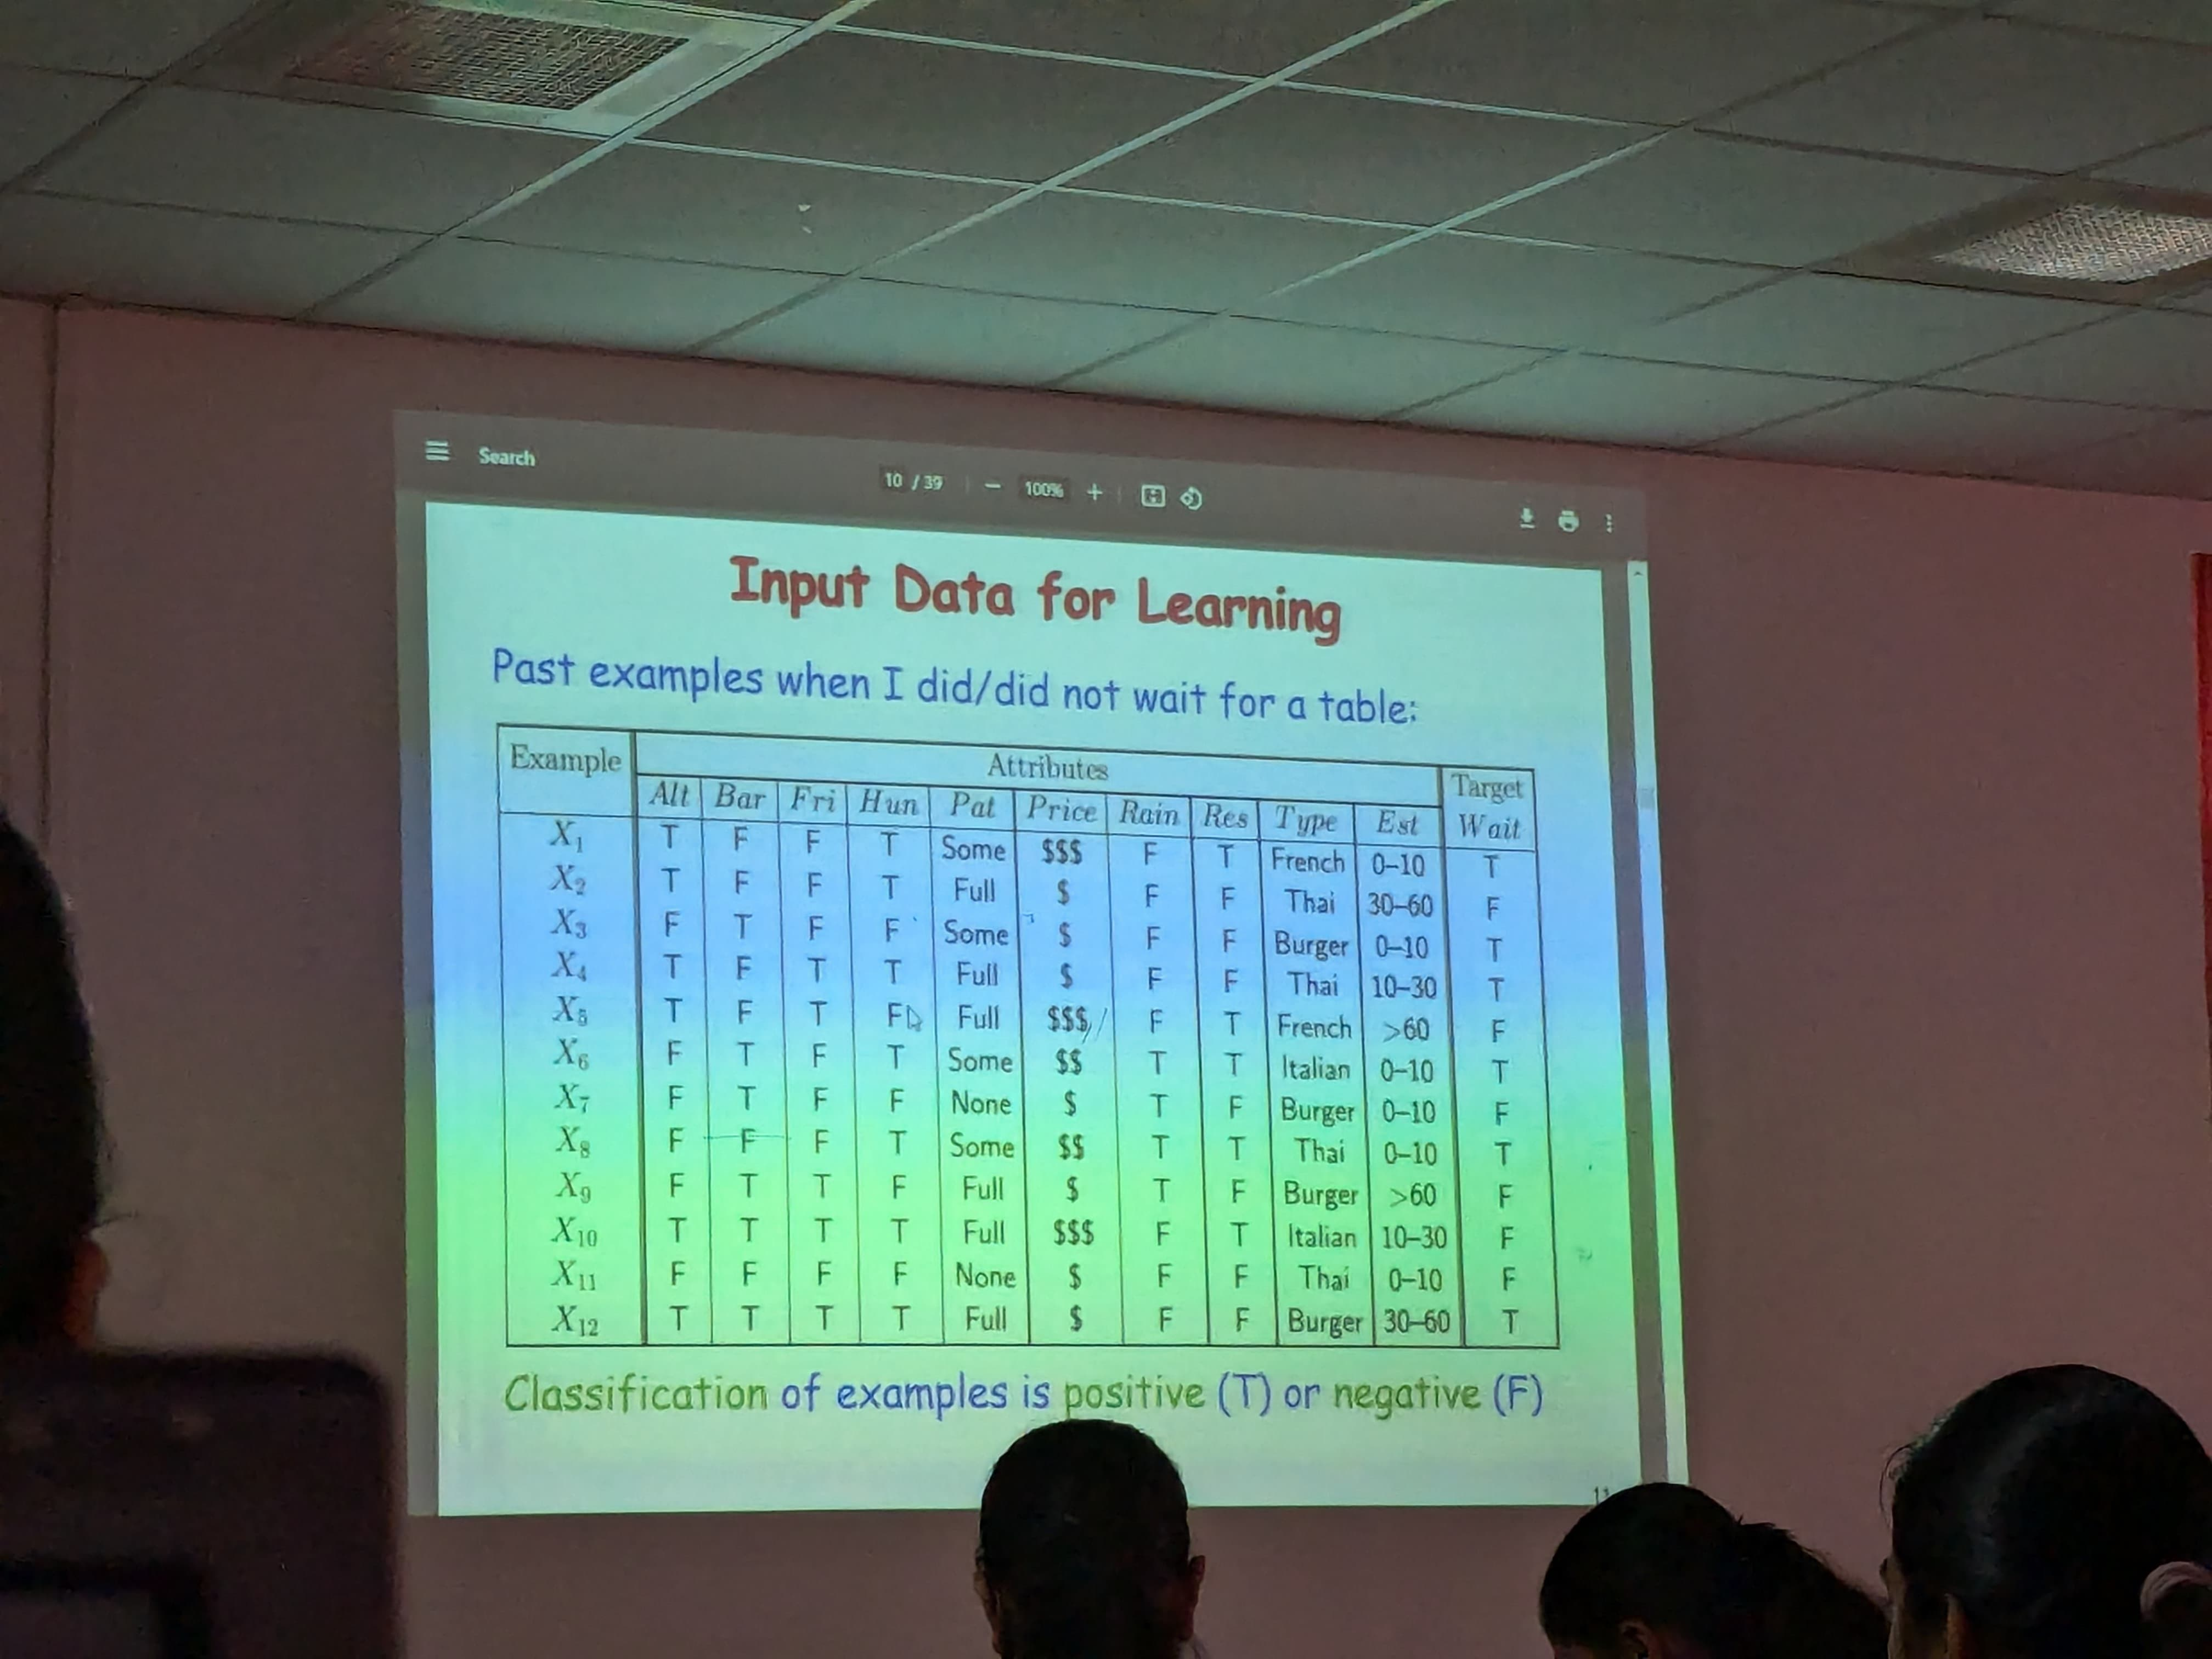

With the type attribute \

$$
S(\text{French}) = -\left( \frac{1}{2} \log_2 \frac{1}{2} + \frac{1}{2} \log_2 \frac{1}{2} \right)$$

\
$$S(\text{Thai}) = -\left( \frac{1}{4} \log_2 \frac{1}{4} + \frac{1}{4} \log_2 \frac{1}{4} \right)$$


$$S(\text{Burger}) = -\left( \frac{1}{4} \log_2 \frac{1}{4} + \frac{1}{4} \log_2 \frac{1}{4} \right)$$


$$S(\text{Italian}) = -\left( \frac{1}{2} \log_2 \frac{1}{2} + \frac{1}{2} \log_2 \frac{1}{2} \right)$$


\
$$S(\text{French}) = -\left( p(\text{Go | French}) \log_2 p(\text{Go | French}) + p(\text{Not Go | French}) \log_2 p(\text{Not Go | French}) \right)$$

\
$$S(\text{Thai}) = -\left( p(\text{Go | Thai}) \log_2 p(\text{Go | Thai}) + p(\text{Not Go | Thai}) \log_2 p(\text{Not Go | Thai}) \right)$$


$$S(\text{Burger}) = -\left( p(\text{Go | Burger}) \log_2 p(\text{Go | Burger}) + p(\text{Not Go | Burger}) \log_2 p(\text{Not Go | Burger}) \right)$$
\
$$S(\text{Italian}) = -\left( p(\text{Go | Italian}) \log_2 p(\text{Go | Italian}) + p(\text{Not Go | Italian}) \log_2 p(\text{Not Go | Italian}) \right)$$

*s(French)* = 1
\
*S(Thai)* = 0.811
\
*S(Burger) = 0.811
\
S(Italian) = 1

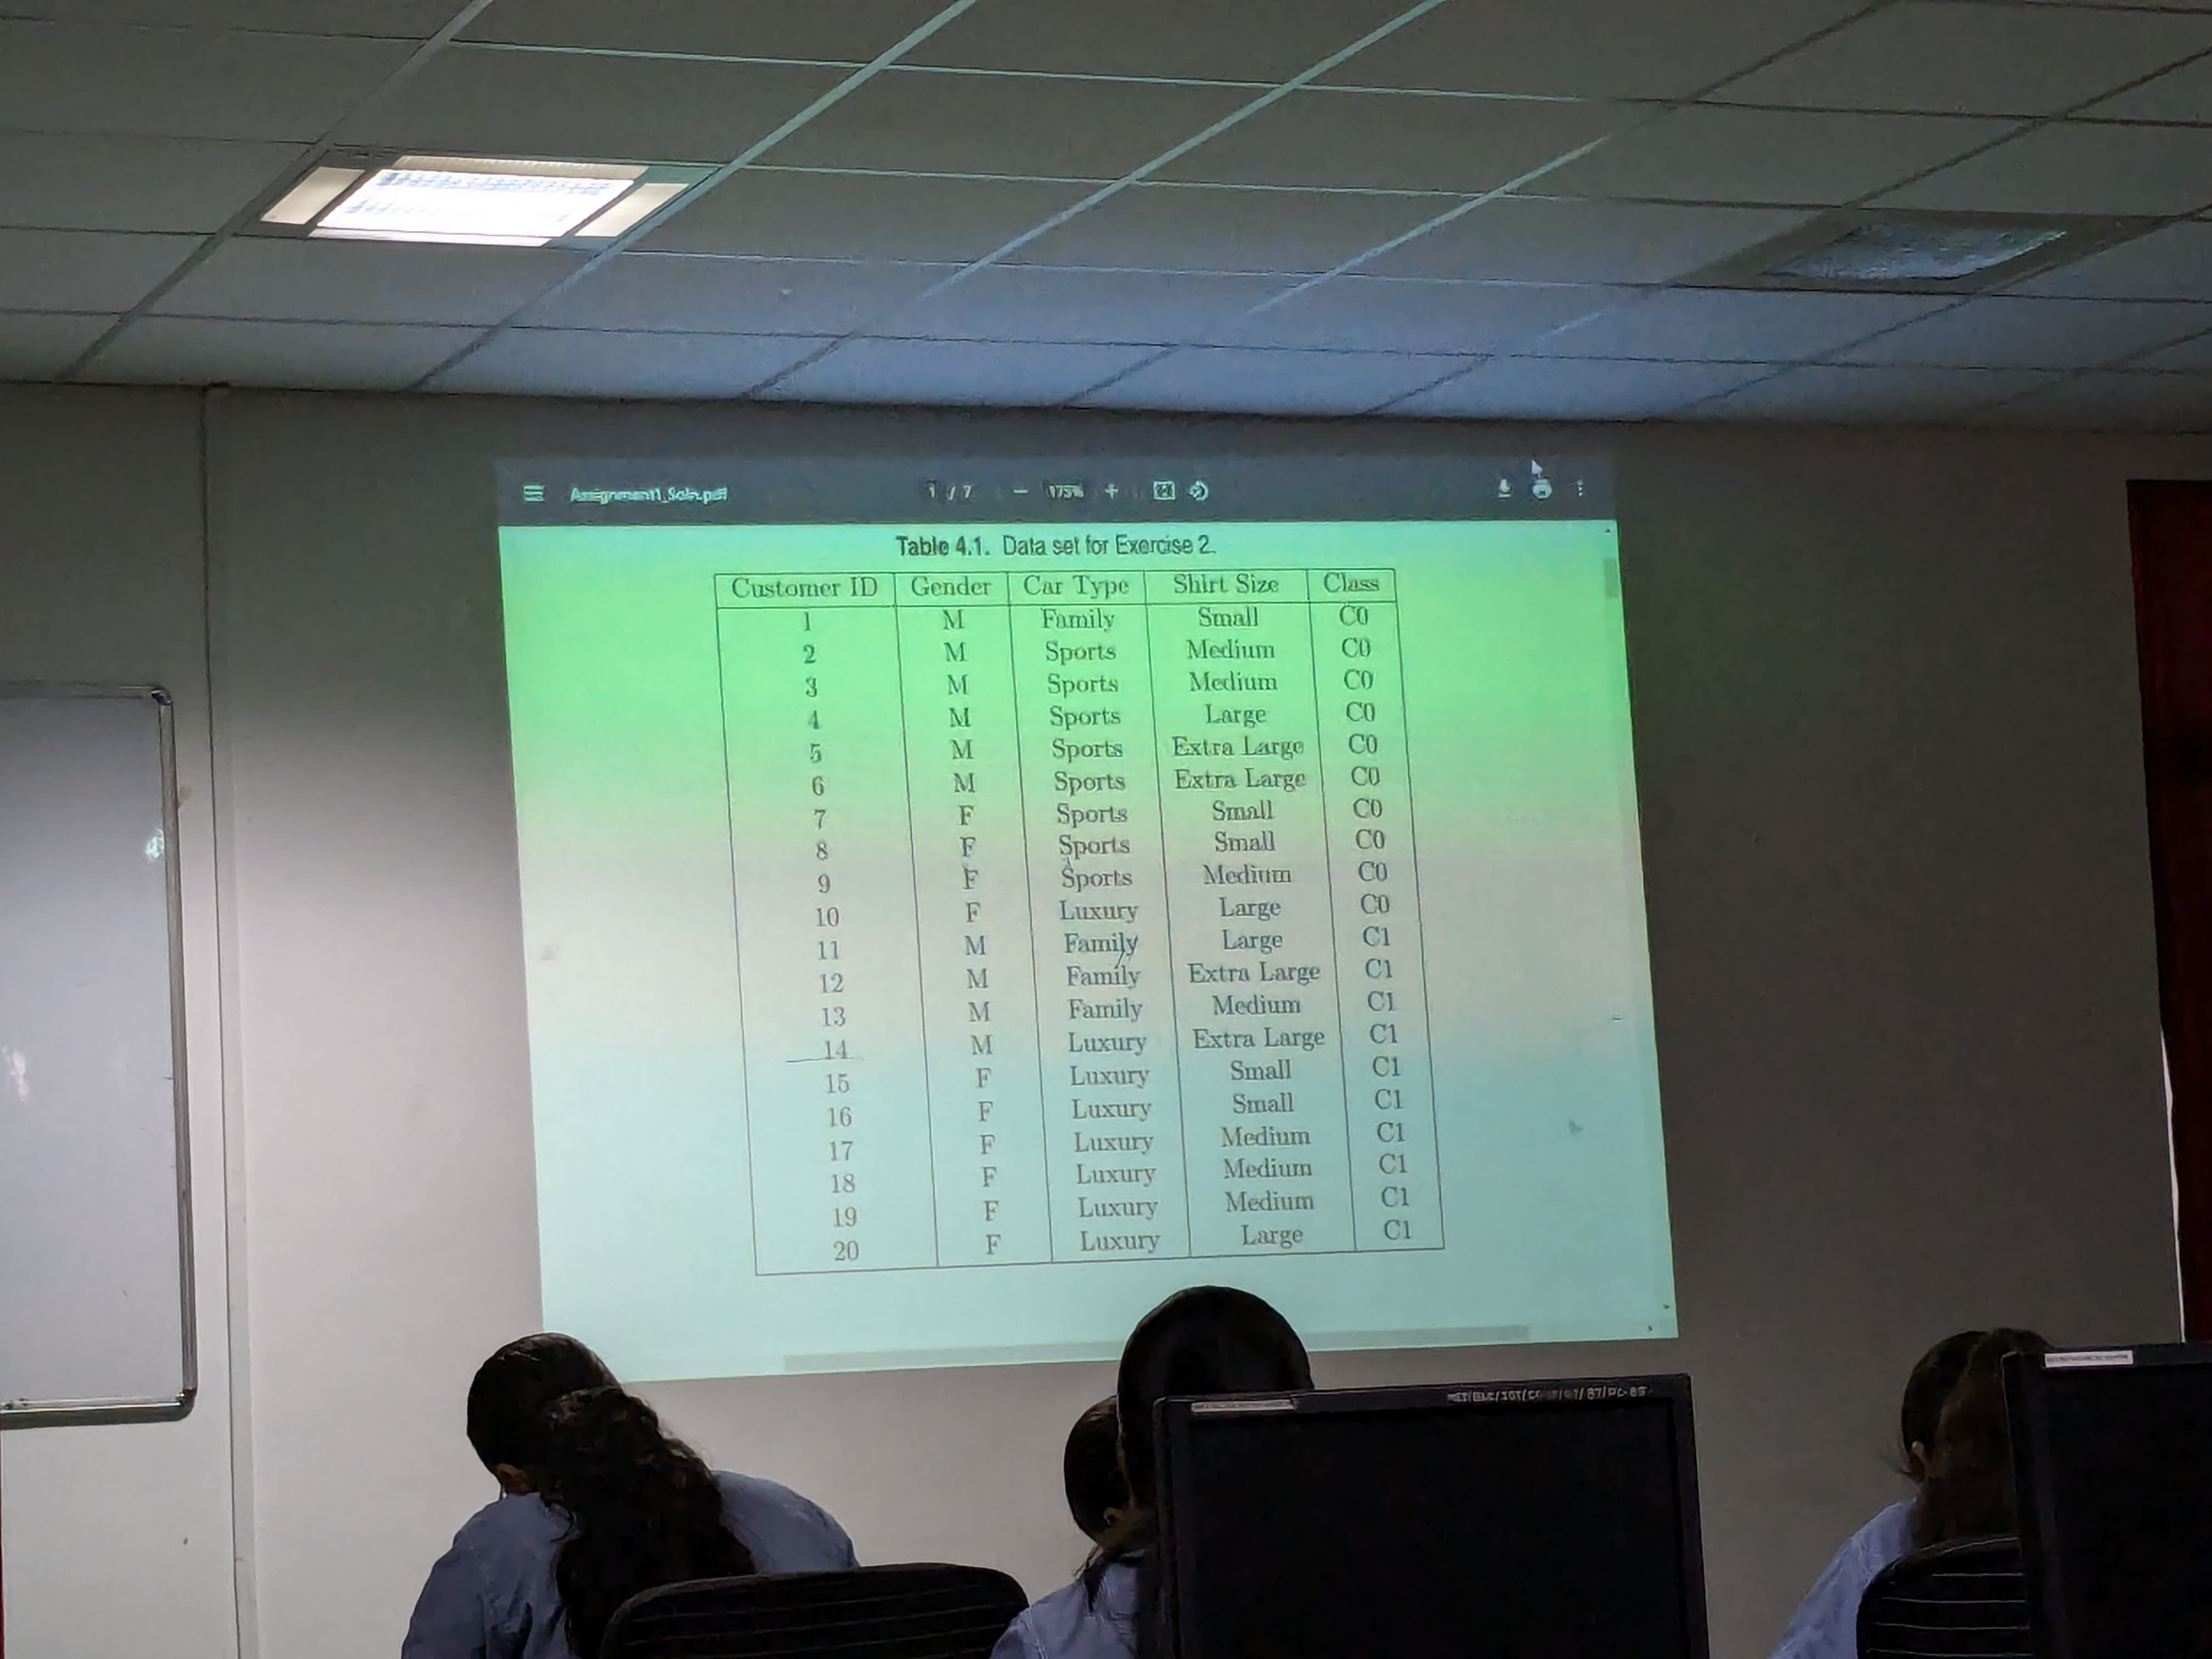

**Geni index and bits**

# Matplotlib

In [2]:
import matplotlib.pyplot as plt
import numpy as np

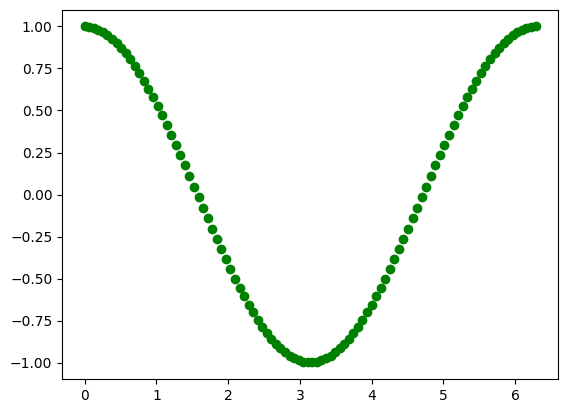

In [16]:
x = np.linspace(0, 2*np.pi, 100)
y = np.cos(x)
fig, ax = plt.subplots()
ax.scatter(x,y, color='green')
fig.savefig('plot.pdf')
plt.show()

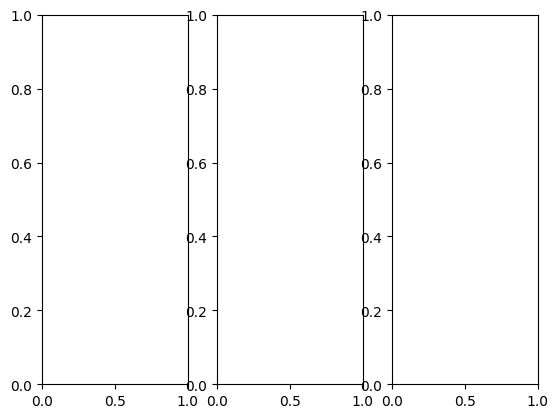

In [19]:
fig, ax = plt.subplots(1,3)
plt.show()

In [22]:
g = gridspec(2,2)
ax = g[0,1]

NameError: name 'gridspec' is not defined

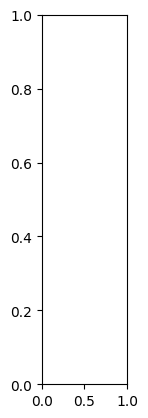

In [29]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec  # Import GridSpec

g = GridSpec(1, 5)  # Create a GridSpec object
ax = plt.subplot(g[0,4])  # Create a subplot using the GridSpec layout

<BarContainer object of 100 artists>

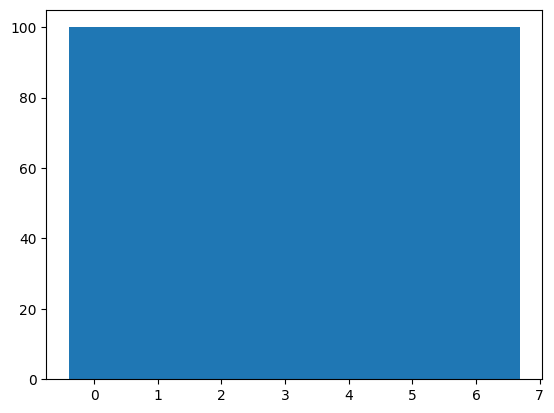

In [34]:
plt.bar(x,100)

In [35]:
import pandas as pd
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [36]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


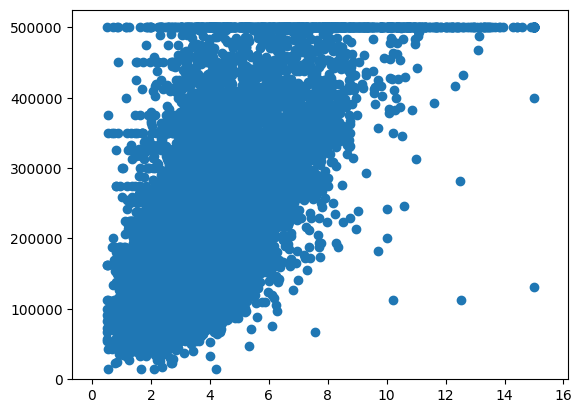

In [40]:
x = df['median_income']
y = df['median_house_value']
arr_x = np.array(x)
arr_y = np.array(y)
plt.scatter(arr_x,arr_y)

plt.show()

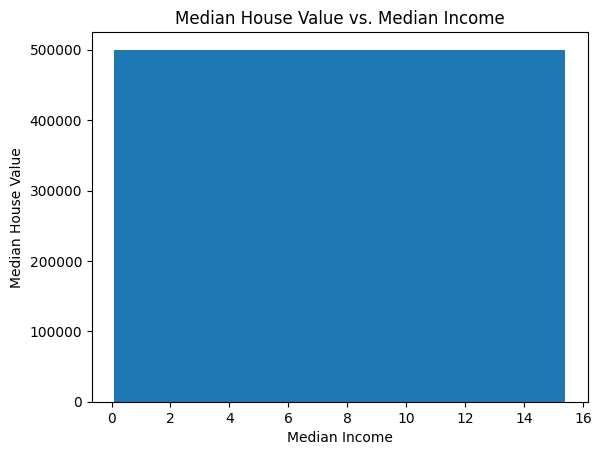

In [42]:
# Assuming 'df' is your DataFrame
x = df['median_income']
y = df['median_house_value']

plt.bar(x, y)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median House Value vs. Median Income')
plt.show()

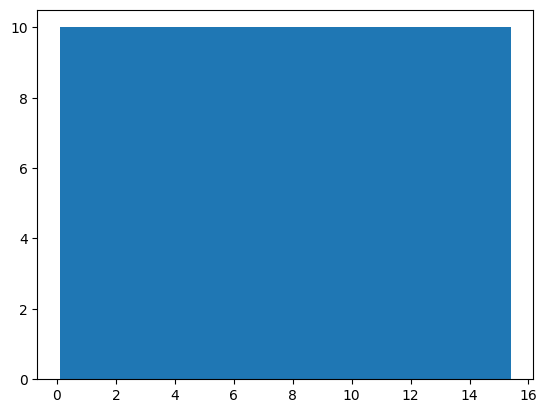

In [41]:
plt.bar(arr_x,10)
plt.show()

In [43]:
from sklearn.linear_model import LogisticRegression

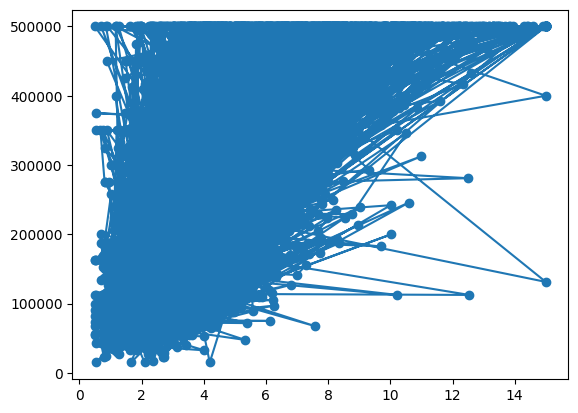

In [44]:
plt.scatter(arr_x,arr_y)
plt.plot(arr_x,arr_y)
plt.show()

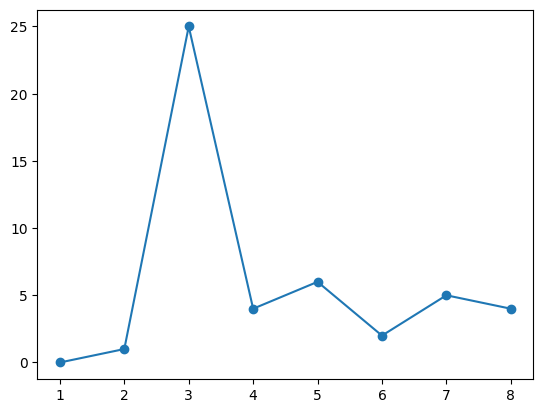

In [50]:
x = np.array([1,2,3,4,5,6,7,8]).reshape(-1,1)
y = np.array([0,1,25,4,6,2,5,4])
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_tr,y)


In [59]:
y_pred = model.predict(x)

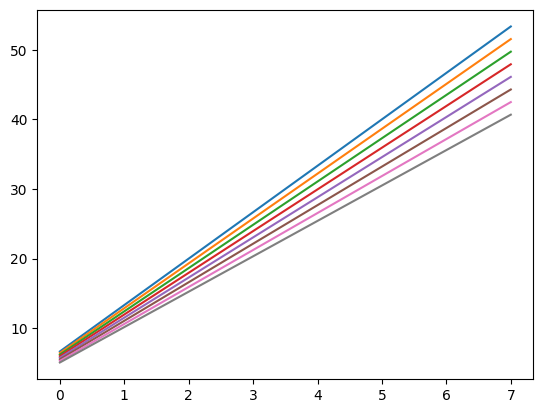

In [62]:
plt.plot(x*y_pred)

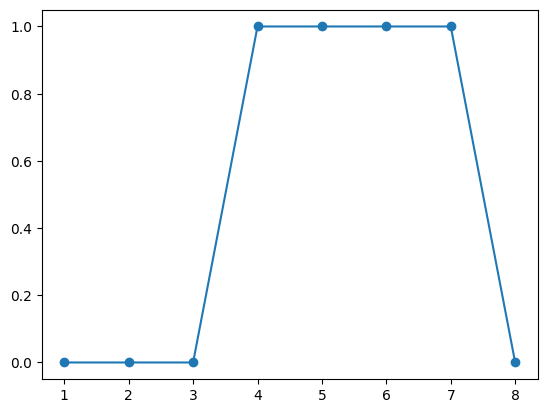

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# y = np.array([1,2,3,4,5,6,7,8])
x = np.array([1,2,3,4,5,6,7,8]).reshape(-1,1)
x_train = x[:-2]
x_test = x[-2:]

y = np.array([0,0,0,1,1,1,1,0])
y_train = y[:-2]
y_test = y[-2:]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [9]:
y_pred = model.predict(x)

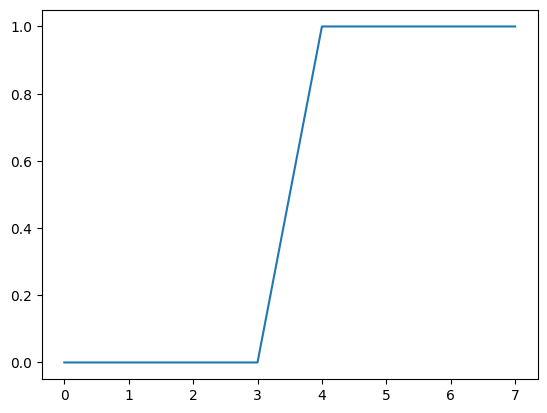

In [10]:
plt.plot(y_pred)

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [72]:
y_pred = model.predict(x_test)

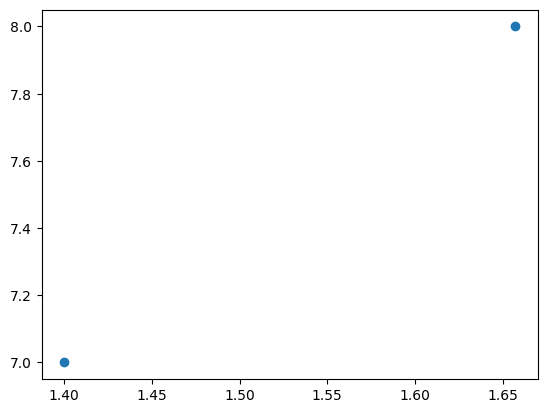

In [77]:
plt.scatter(y_pred,x_test)

In [12]:
import pandas as pd
df = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [13]:
df = df.replace({'Setosa': 0 , 'Virginica': 1, 'Versicolor': 1})

In [14]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [15]:
df.corr()

,sepal.length,sepal.width,petal.length,petal.width,variety
sepal.length,1.000000,-0.117570,0.871754,0.817941,0.717416
sepal.width,-0.117570,1.000000,-0.428440,-0.366126,-0.603348
petal.length,0.871754,-0.428440,1.000000,0.962865,0.922765
petal.width,0.817941,-0.366126,0.962865,1.000000,0.887344
variety,0.717416,-0.603348,0.922765,0.887344,1.000000


In [16]:
x = np.array(df['petal.length']).reshape(-1,1)
y = df['variety']
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [17]:
y_pred = model.predict(x)

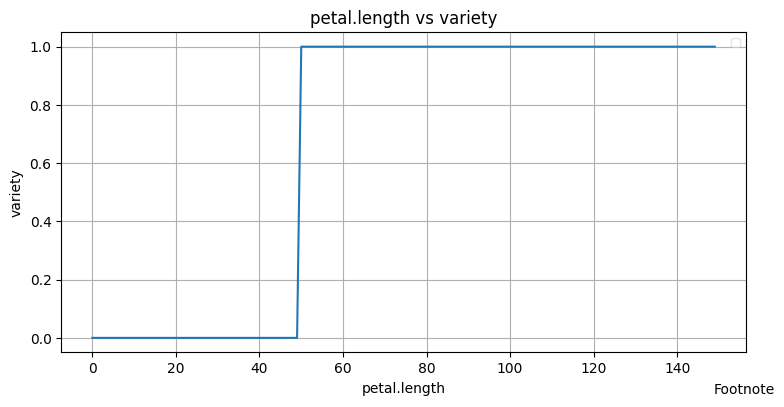

In [18]:
import matplotlib.pyplot as plt
plt.xlabel('petal.length')
plt.ylabel('variety')
plt.title('petal.length vs variety')
plt.grid(True)
plt.figtext(0.995, 0.01, 'Footnote', ha='right', va='bottom')
plt.legend(loc='best',framealpha = 0.5,prop = {'size':'small'})
plt.tight_layout()
plt.gcf().set_size_inches(8,4)
plt.plot(y_pred)

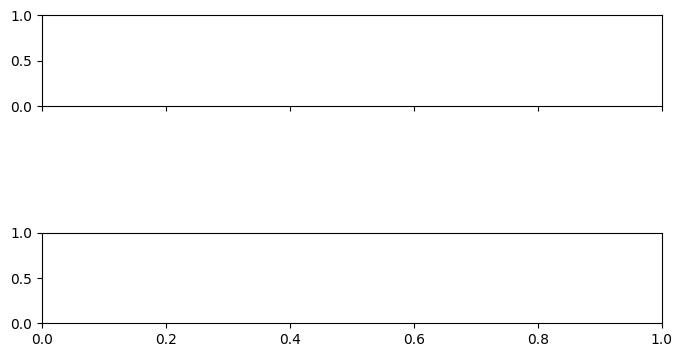

In [31]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows= 3,ncols=1,sharex= True,figsize=(8,4))
fig.delaxes(ax2)
plt.show()

In [27]:
for ax in fig.get_axes():
    pass

In [29]:
fig.delaxes(ax2)

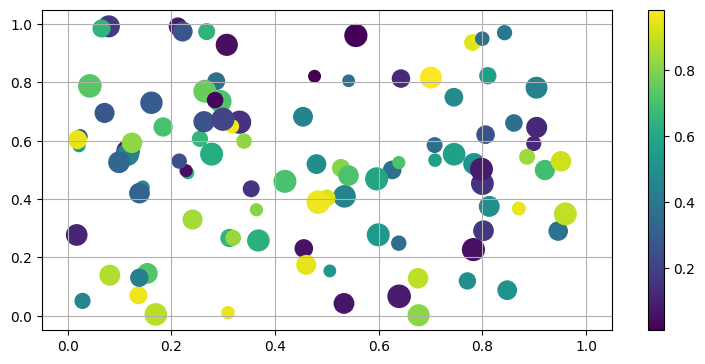

In [42]:
N = 100
x = np.random.rand(N)
y = np.random.rand(N)
size = ((np.random.rand(N)+1)*8)**2
colours = np.random.rand(N)
fig, ax = plt.subplots(figsize=(8,4))
l = ax.scatter(x,y,s = size,c=colours)
fig.colorbar(l)
ax.set_xlim((-0.05,1.05))
ax.set_ylim((-0.05,1.05))
fig.tight_layout(pad=2)
ax.grid(True)
plt.show()

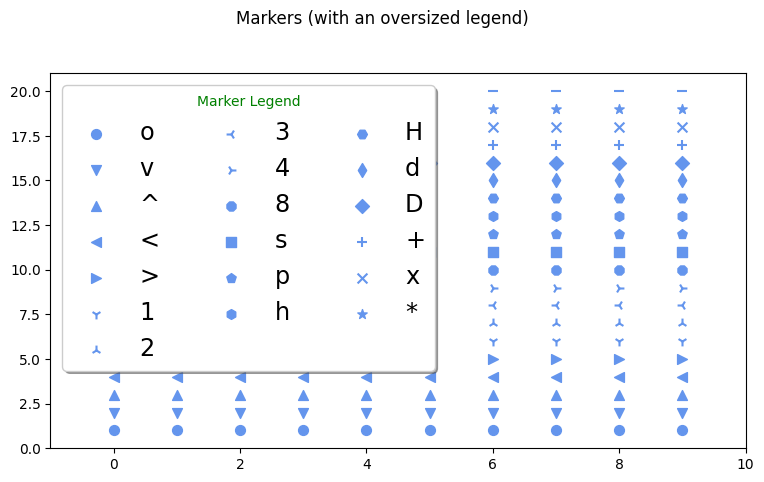

In [48]:
fig, ax = plt.subplots(figsize=(8,5))
markers = list('ov^<>12348sphHdD+x*_')

N = 10

for i, m in enumerate (markers):
  x= np.arange(N)

  y= np.repeat(i+1, N)

  ax.scatter(x, y, marker=m, label=m, s=50, c='cornflowerblue')

ax.set_xlim((-1,N))

ax.set_ylim((0,len(markers)+1))

ax.legend(loc='upper left', ncol=3,prop={'size': 'xx-large'},shadow=True, title='Marker Legend')

ax.get_legend().get_title().set_color("green")

fig.suptitle('Markers ' + '(with an oversized legend)')

fig.tight_layout(pad=2);

fig.savefig('filename.png', dpi=125)

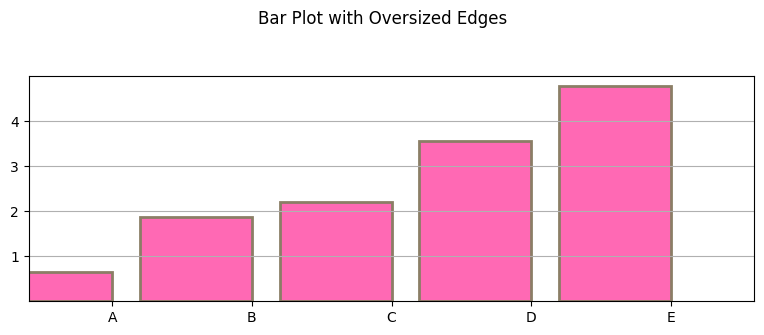

In [55]:
N=5


labels = list('ABCDEFGHIJKLM' [0:N])

data = np.array (range(N)) + np.random.rand(N)

#plot the data

fig, ax = plt.subplots(figsize=(8, 3.5))
width=0.8;

tickLocations=  np.arange(N)

rectLocations = tickLocations-(width/2.0)

ax.bar(rectLocations, data, width,color='hotpink',edgecolor='#8B7E66', linewidth=2.0)

# pretty-up the plot

ax.set_xticks(ticks = tickLocations)

ax.set_xticklabels (labels)

ax.set_xlim(min(tickLocations)-0.6, max(tickLocations)+0.6)

ax.set_yticks(range (N) [1:])

ax.set_ylim((0,N))

ax.yaxis.grid(True)

# title and save
fig.suptitle("Bar Plot with " + "Oversized Edges")
fig.tight_layout(pad=2)

In [93]:
import pandas as pd
df = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
counts = df.groupby('variety')['sepal.length'].count()
counts

variety
Setosa        50
Versicolor    50
Virginica     50
Name: sepal.length, dtype: int64

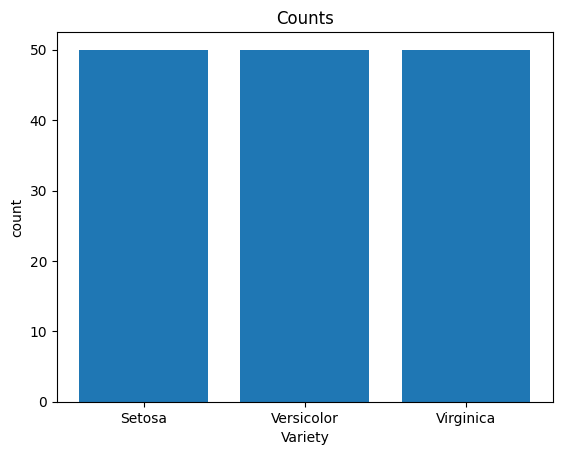

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

plt.bar(counts.index, counts.values)

plt.xlabel("Variety")
plt.ylabel("count")
plt.title("Counts")

plt.show()


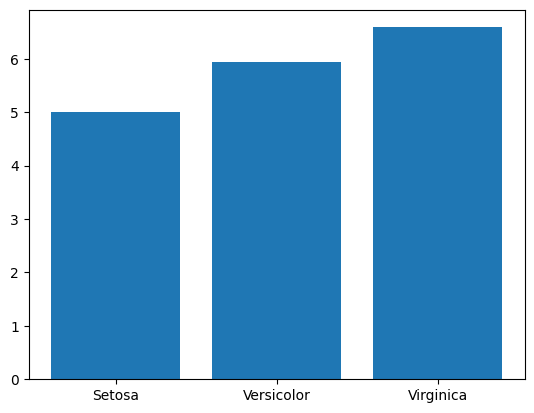

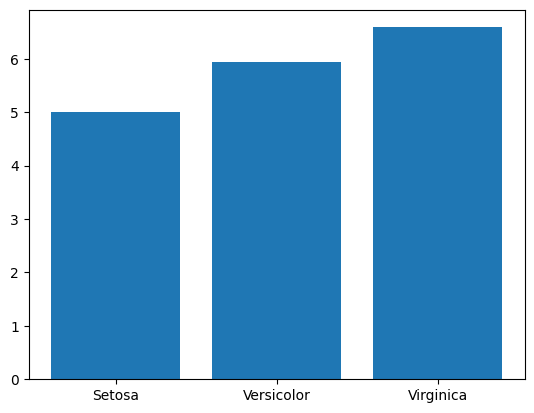

variety
Setosa        50
Versicolor    50
Virginica     50
Name: sepal.length, dtype: int64

In [98]:
df1 = df.groupby('variety').mean()
df1
labels = np.array(df1.index)
data = np.array(df1.values)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.bar(labels, data.T[0])
plt.show

fig, ax = plt.subplots()
plt.bar(labels, data.T[0])
plt.show()



In [99]:
counts = df.groupby('variety')['sepal.length'].min()
counts

variety
Setosa        4.3
Versicolor    4.9
Virginica     4.9
Name: sepal.length, dtype: float64

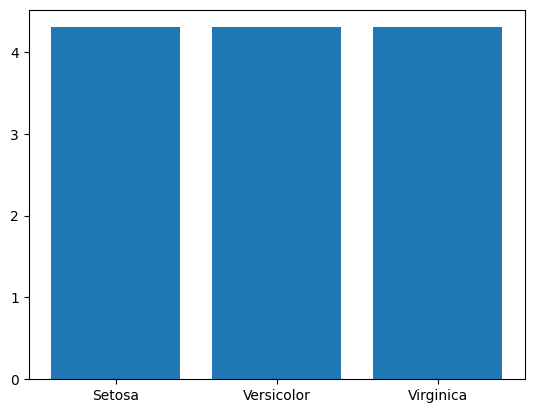

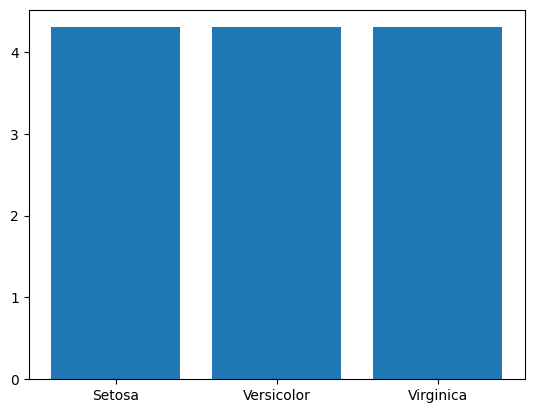

In [100]:
labels = np.array(counts.index)
data = np.array(counts.values)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.bar(labels, data.T[0])
plt.show

fig, ax = plt.subplots()
plt.bar(labels, data.T[0])
plt.show()

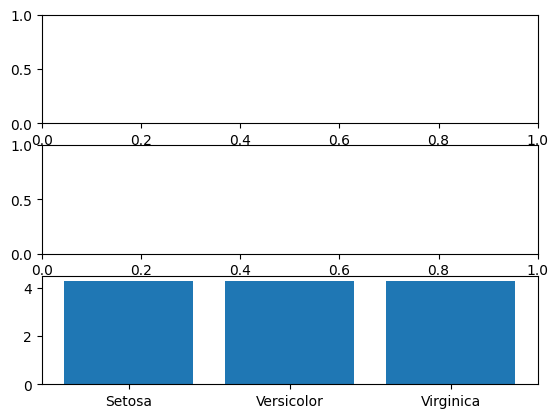

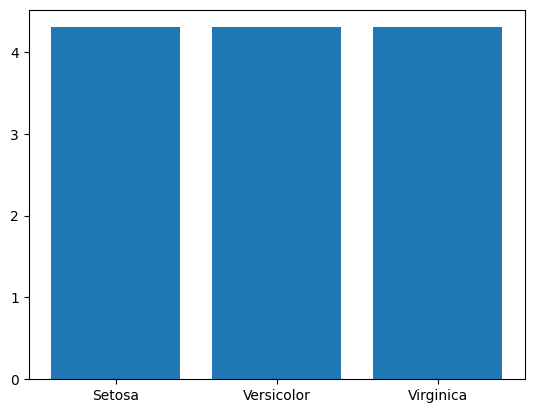

In [101]:
# draw fig with 3 subplots containing bar graph of mean sepal length
# count variety
# max petal width
fig, ax = plt.subplots(3,1)
plt.bar(labels, data.T[0])
plt.sh

fig, ax = plt.subplots()
plt.bar(labels, data.T[0])
plt.show()